## **Combine all years**

In [ ]:
import pandas as pd


df_2021 = pd.read_csv("2021/d_f_mdr_ae_2021_cleaned_with_year.csv")
df_2022 = pd.read_csv("2022/d_f_mdr_ae_2022_cleaned_with_year.csv")
df_2023 = pd.read_csv("2023/d_f_mdr_ae_2023_cleaned_with_year.csv")
df_2024 = pd.read_csv("2024/d_f_mdr_ae_2024_cleaned_with_year.csv")


merged_df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

merged_df.to_csv("merged/d_f_mdr_ae_merged.csv", index=False)


In [ ]:
print(df_2024.shape)
print(df_2023.shape)
print(df_2022.shape)
print(df_2021.shape)
print(merged_df.shape)


(286673, 15)
(209580, 15)
(127462, 15)
(100479, 15)
(724194, 15)


## **Extract adverse events with handling of negations with freq count**

In [ ]:



custom_ae_keywords = {
    "device_malfunction": [
        "broken", "crack", "critical pump error", "defect", "failure", "gear jam", "glitch", "hardware failure",
        "inoperative", "internal damage", "jammed", "leak", "malfunction", "mechanical issue", "motor error",
        "nonfunctional", "insulin gauge was inaccurate", "open book icon", "pump error", "sensor failure", "unresponsive", "worn out", "over delivering"
    ],
    "delivery_errors": [
        "basal delivery failure", "bolus error", "dose error", "dose issue", "inaccurate delivery", "infusion error",
        "no insulin delivery","not receiving insulin", "overdelivery", "suspension issue", "underdelivery", "wrong dosage"
    ],
    "hypoglycemia": [
        "blurred vision", "clammy skin", "confusion", "disoriented", "dizziness", "hypoglycemia", "lethargy", "hypoglycaemic",
        "loss of consciousness", "low blood sugar", "seizure", "shakiness", "sweating", "low blood glucose", "low insulin", "blood glucose decreased"
    ],
    "hyperglycemia": [
        "confusion", "dehydration", "dry mouth", "fatigue", "frequent urination", "fruity breath",
        "high blood sugar", "hyperglycemia", "nausea", "thirst", "vomiting", "high blood glucose", "hyperglycaemic", "high ketone", "large ketone", "elevated blood glucose"
    ],
    "diabetic_ketoacidosis": [
        "abdominal pain", "acidosis", "diabetic ketoacidosis", "dka", "fruity breath", "ketoacidosis symptoms",
        "ketones", "labored breathing", "mental fog", "nausea", "rapid breathing", "vomiting"
    ],
    "skin_irritation": [
        "blister", "bruise", "burn", "irritation", "itching", "rash", "site redness", "site soreness",
        "skin breakdown", "skin discoloration"
    ],
    "infection": [
        "abscess","pod was worn", "cellulitis", "fever", "infection", "inflammation", "inflammatory reaction", "oozing wound",
        "pus", "redness with warmth", "sepsis", "site drainage", "site swelling", "swelling"
    ],
    "site_issues": [
        "bent cannula", "dislodged cannula", "infusion site problem", "insertion problem", "kinked tubing",
        "needle issue", "occlusion", "site failure", "site leak", "bleeding"
    ],
    "battery_issues": [
        "battery depleted", "battery failure", "charging issue", "dead battery", "device shutdown", "low battery",
        "power loss", "power outage", "voltage drop", "depleting"
    ],
    "software_firmware_issues": [
        "crash", "firmware issue", "freezing screen", "loop error", "programming error", "rebooting", "software bug",
        "software reset", "update failure"
    ],
    "alarm_failures": [
        "alarm failure", "alarm not audible", "alarm not triggered", "delayed alert", "false alarm", "missed alarm",
        "no alert"
    ],
    "display_errors": [
        "dim screen", "display flicker", "display issue", "display unreadable", "faded screen", "lcd problem",
        "screen not working", "screen off"
    ],
    "button_interface": [
        "action button not working", "button cracked", "button stuck", "input delay", "keypad peeling",
        "navigation error", "touch screen failure", "unresponsive button"
    ],
    "adhesive_failures": [
        "adhesive failed", "overlay peeling", "patch fell off", "retainer issue", "site detached",
        "site didn't stick", "tape loosened"
    ],
    "device_damage": [
        "battery tube damage", "broken housing", "cracked case", "cracked screen", "damaged port",
        "detached retainer", "dropped device", "exposed wire", "peeling overlay", "physical damage"
    ],
    "connection_failures": [
        "cannula detached", "communication error", "connection lost", "disconnection", "lost pairing",
        "sensor unplugged", "signal drop", "tubing disconnected"
    ],
    "user_error": [
        "forgot to change site", "forgot to refill", "improper setup", "incomplete priming", "incorrect setup",
        "incorrect use", "misprogrammed", "misuse", "not trained", "user error", "wrong settings"
    ],
    "training_deficiency": [
        "confusing instructions", "inadequate training", "lack of understanding", "poor education",
        "setup confusion", "unclear labeling"
    ],
    "death_event": [
        "death", "demise", "died", "expired", "fatal", "loss of life", "passed away", "patient death",
        "patient died"
    ],
    "software_firmware": [
        "firmware issue", "programming error", "reboot loop", "software bug", "update failure"
    ],
    "display_screen": [
        "display error", "faded screen", "lcd issue", "screen flicker", "screen off", "blank display", "frozen display"
    ],
    "alarm_alerts": [
        "alarm failure", "delayed alarm", "false alarm", "flow blocked alarm", "missed alert", "motor error alarm",
        "no sound", "pump alarmed"
    ],
    "user_interface": [
        "button stuck", "input failure", "navigation error", "touchscreen unresponsive", "button was stuck", "stuck button"
    ],
    "physical_damage": [
        "broken housing", "cosmetic damage", "cracked", "cracked case", "damaged rails", "scratched", "damage", "damaged"
    ],
    "retainer_ring": [
        "cracked retainer", "damaed retainer", "detached retainer", "loose retainer", "retainer damage", "retainer detached", "retainer ring damage", "retainer cracked", "retainer crack"
    ],
    "belt_clip": [
        "belt rail failure", "broken belt clip", "clip cracked", "damaged clip", "clip damaged", "belt rail failed", "belt clip broke", "clip damage", "failed belt clip"
    ],
    "tube_cannula": [
        "blocked cannula", "disconnected tubing", "kinked tube", "occlusion", "tube disconnected", "bent"
    ],
    "site_irritation": [
        "blister", "scarring", "wound", "burn", "irritation", "rash", "redness", "site pain", "pain", "back pain"
    ],
    "missing_parts": [
        "detached housing", "missing battery cap", "missing component", "missing part", "missing battery"
    ],
    "unknown": [
        "not identified", "undetermined", "unknown cause", "unknown issue", "ambiguous", "no clear cause", "not identified", "root cause not found", "unable to determine",
        "unclear issue", "undetermined", "unknown reason"
    ],
    "injury": [
        "puerto rico manufacturing site", "glycaemic", "continuous glucose", "allergic", "lost consciousness", "cyst", "faint", "medical attention ", "blood glucose level", "blood glucose", "hospitalized", "depleting", "hospital", "emergency", "bolus", "dermatitis reaction"
    ]
}   




In [ ]:
import pandas as pd
import re
from collections import Counter
from pathlib import Path

merged_df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

merged_df["cleaned_foitext"] = merged_df["cleaned_foitext"].fillna("")



negation_cues = ["no", "not", "none", "without", "never", "denies", "didn't", "did not", "ruled out", "lack of"]

def is_negated(text, keyword, window=3):
    tokens = text.lower().split()
    keyword_tokens = keyword.lower().split()
    keyword_len = len(keyword_tokens)
    for i in range(len(tokens) - keyword_len + 1):
        if tokens[i:i+keyword_len] == keyword_tokens:
            context_window = tokens[max(0, i - window):i]
            for neg in negation_cues:
                if neg in context_window:
                    return neg
    return None

def extract_details(text):
    text_lower = str(text).lower()
    matched = {}
    matched_words = []
    matched_categories = set()
    neg_word = ""
    
    for category, keywords in custom_ae_keywords.items():
        found = []
        for kw in keywords:
            if kw in text_lower:
                negation = is_negated(text_lower, kw)
                if negation:
                    neg_word = negation
                else:
                    found.append(kw)
                    matched_words.append(kw)
                    matched_categories.add(category)
        if found:
            matched[category] = found
    
    ae_pred = "Y" if matched else "N"
    ae_matched_word = ", ".join(matched_words)
    ae_matched_label = ", ".join(sorted(matched_categories))  
    ae_neg = "neg" if neg_word else ""
    ae_neg_word = neg_word
    return ae_pred, matched, ae_matched_word, ae_matched_label, ae_neg, ae_neg_word


details = merged_df["cleaned_foitext"].apply(extract_details)

merged_df["ae_pred"] = details.map(lambda x: x[0])
merged_df["ae_matched_labels"] = details.map(lambda x: x[1])
merged_df["ae_matched_word"] = details.map(lambda x: x[2])
merged_df["ae_matched_label"] = details.map(lambda x: x[3])
merged_df["ae_neg"] = details.map(lambda x: x[4])
merged_df["ae_neg_word"] = details.map(lambda x: x[5])


merged_df.to_csv("merged/merged_preds.csv", index=False)


from collections import Counter
import ast

category_freq = Counter()
keyword_freq = Counter()

for label_dict in merged_df["ae_matched_labels"]:
    if isinstance(label_dict, str):
        label_dict = ast.literal_eval(label_dict)
    for category, matched_keywords in label_dict.items():
        category_freq[category] += 1
        keyword_freq.update(matched_keywords)


flat_freq_csv = ["type,term,count"]
flat_freq_csv += [f"category,{term},{count}" for term, count in category_freq.most_common()]
flat_freq_csv += [f"keyword,{term},{count}" for term, count in keyword_freq.most_common()]
Path("merged/merged_preds_freq.csv").write_text("\n".join(flat_freq_csv))


structured_rows = []
for category in category_freq:
    structured_rows.append({
        "category": category,
        "keyword": "",
        "category_count": category_freq[category],
        "keyword_count": ""
    })
    matched_keywords = []
    for label_dict in merged_df["ae_matched_labels"]:
        if isinstance(label_dict, str):
            label_dict = ast.literal_eval(label_dict)
        if category in label_dict:
            matched_keywords.extend(label_dict[category])
    local_kw_freq = Counter(matched_keywords)
    for kw, count in local_kw_freq.items():
        structured_rows.append({
            "category": "",
            "keyword": kw,
            "category_count": "",
            "keyword_count": count
        })

pd.DataFrame(structured_rows).to_csv("merged/merged_preds_freq_struct.csv", index=False)

print("Finished: Outputs are saved as 'merged_preds.csv', 'merged_preds_freq.csv', 'merged_preds_freq_struct.csv'")


✅ Finished: Outputs are saved as 'merged_preds.csv', 'merged_preds_freq.csv', 'merged_preds_freq_struct.csv'


## **Accuracy ae_flag vs ae_pred**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df_acc = pd.read_csv("merged/merged_preds.csv")

df_acc = df_acc[df_acc['ADVERSE_EVENT_FLAG'].isin(['Y', 'N'])]

df_acc['true'] = df_acc['ADVERSE_EVENT_FLAG'].map({'Y': 1, 'N': 0})

df_acc['pred'] = df_acc['ae_pred'].map({'Y': 1, 'N': 0, 1: 1, 0: 0})

df_acc = df_acc.dropna(subset=['pred'])

# confusion matrix
acc = accuracy_score(df_acc['true'], df_acc['pred'])
conf_matrix = confusion_matrix(df_acc['true'], df_acc['pred'])
class_report = classification_report(df_acc['true'], df_acc['pred'])

false_positives = df_acc[(df_acc['ae_pred'] == 'Y') & (df_acc['ADVERSE_EVENT_FLAG'] == 'N')]
false_negatives = df_acc[(df_acc['ae_pred'] == 'N') & (df_acc['ADVERSE_EVENT_FLAG'] == 'Y')]

false_positives.to_csv("merged/false_positives_ae.csv", index=False)
false_negatives.to_csv("merged/false_negatives_ae.csv", index=False)

(acc, conf_matrix, class_report, len(false_positives), len(false_negatives))


(0.32227138032074276,
 array([[182319, 484227],
        [  6580,  51068]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.27      0.43    666546\n           1       0.10      0.89      0.17     57648\n\n    accuracy                           0.32    724194\n   macro avg       0.53      0.58      0.30    724194\nweighted avg       0.90      0.32      0.41    724194\n',
 484227,
 6580)

In [ ]:
## Checking false negs

false_neg_df = pd.read_csv("merged/false_negatives_ae.csv")

false_neg_df["cleaned_foitext"] = false_neg_df["cleaned_foitext"].fillna("").astype(str)

filtered_df = false_neg_df[false_neg_df["cleaned_foitext"].str.lower().str.startswith("it was reported")]

filtered_path = "merged/false_neg_repair.csv"
filtered_df.to_csv(filtered_path, index=False)

filtered_path, filtered_df.shape


('merged/false_neg_repair.csv', (45, 23))

In [12]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from collections import Counter
import re

df_repair = pd.read_csv("merged/false_neg_repair.csv")

texts = df_repair["cleaned_foitext"].fillna("").astype(str)

word_counter = Counter()
for text in texts:
    words = re.findall(r'\b[a-z]+\b', text.lower())
    word_counter.update(words)

top_words = word_counter.most_common(150)
top_words_df = pd.DataFrame(top_words, columns=["word", "count"])

top_words_df.to_csv("top_words_in_false_neg_repair.csv", index=False)


In [ ]:
import pandas as pd

df_repair = pd.read_csv("merged/false_positives_ae.csv")  

event_type_counts = df_repair["EVENT_TYPE"].value_counts(dropna=False)

print(event_type_counts)


EVENT_TYPE
M      480074
IN       4111
D          37
NaN         3
O           2
Name: count, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("merged/false_positives_ae.csv") 

df_filtered = df[df["EVENT_TYPE"].isin(["IN", "D"])]

filtered_path = "merged/false_pos_repair.csv"
df_filtered.to_csv(filtered_path, index=False)

filtered_path, df_filtered.shape


('merged/false_pos_repair.csv', (4148, 23))

## **Classify keywords into categories**

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

keywords = [
    "malfunction", "defect", "puerto rico manufacturing site", "occlusion", "blood glucose", "damage",
    "hyperglycemia", "blood glucose level", "crack", "cracked", "cracked case", "failure", "bent", "damaged",
    "broken", "pump error", "bent cannula", "scratched", "hospital", "critical pump error", "cracked retainer",
    "cosmetic damage", "unable to determine", "blank display", "hypoglycemia", "high blood glucose", "depleting",
    "unresponsive", "flow blocked alarm", "acidosis", "leak", "diabetic ketoacidosis", "bolus", "hospitalized",
    "continuous glucose", "pod was worn", "irritation", "physical damage", "retainer crack", "retainer cracked",
    "motor error", "emergency", "low blood glucose", "low battery", "detached retainer", "broken belt clip",
    "vomiting", "motor error alarm", "power loss", "stuck button", "infection", "unresponsive button",
    "retainer ring damage", "pump alarmed", "nausea", "insulin gauge was inaccurate", "ketones", "pain",
    "elevated blood glucose", "bleeding", "frozen display", "pus", "missing battery", "confusion", "over delivering",
    "burn", "overlay peeling", "death", "fatal", "passed away", "missing battery cap", "button cracked",
    "loss of consciousness", "redness", "rash", "dka", "medical attention", "swelling", "seizure", "thirst",
    "dizziness", "dislodged cannula", "fatigue", "sweating", "communication error", "high ketone", "itching",
    "allergic", "abdominal pain", "dehydration", "died", "loose retainer", "expired", "no insulin delivery",
    "scarring", "lost consciousness", "display issue", "abscess", "cellulitis", "high blood sugar", "wound",
    "bruise", "mechanical issue", "button stuck", "fever", "battery failure", "not identified", "inflammation",
    "blister", "low blood sugar", "dry mouth", "faint", "no alert", "large ketone", "retainer damage",
    "frequent urination", "disconnection", "worn out", "adhesive failed", "display error", "glycaemic",
    "blurred vision", "button was stuck", "missing part", "unknown reason", "jammed", "underdelivery",
    "sensor failure", "crash", "undetermined", "disoriented", "cracked screen", "charging issue",
    "battery depleted", "battery tube damage", "blood glucose decreased", "false alarm", "back pain",
    "unknown issue", "sepsis", "low insulin", "overdelivery", "hypoglycaemic", "patient death", "lethargy",
    "user error", "hyperglycaemic", "hardware failure", "misuse", "belt clip broke", "clip damage",
    "ketoacidosis symptoms", "glitch", "no sound", "cyst", "needle issue", "not trained", "rebooting",
    "site pain", "keypad peeling", "unknown cause", "not receiving insulin", "site failure", "site leak",
    "damaged clip", "kinked tubing", "shakiness", "faded screen", "patient died", "site swelling", "fruity breath",
    "screen off", "damaged port", "clip damaged", "skin discoloration", "peeling overlay", "programming error",
    "software bug", "internal damage", "dead battery", "connection lost", "lost pairing", "missing component",
    "screen flicker", "bolus error", "cannula detached", "clip cracked", "nonfunctional", "clammy skin",
    "incorrect use", "labored breathing", "dim screen", "power outage", "dermatitis reaction", "improper setup",
    "voltage drop", "screen not working", "retainer detached", "action button not working", "inflammatory reaction",
    "incorrect setup", "display flicker", "loop error", "blocked cannula", "unclear issue", "inaccurate delivery",
    "ambiguous"
]



model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(keywords)


clustering = AgglomerativeClustering(n_clusters=30)  
labels = clustering.fit_predict(embeddings)

df = pd.DataFrame({'keyword': keywords, 'cluster': labels})
cluster_distribution = df.groupby('cluster')['keyword'].apply(list).reset_index()
cluster_distribution.columns = ['Cluster', 'Keywords']

csv_path = "merged/clustered_keywords.csv"
cluster_distribution.to_csv(csv_path, index=False)

print("Clustered keyword CSV saved to:", csv_path)


## **Mapping clusters**

In [ ]:
## Naming clusters


import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

file_path = "merged/clustered_keywords.csv"  
df_clusters = pd.read_csv(file_path)

def safe_parse_keywords(text):
    return re.findall(r"'(.*?)'", text) 

df_clusters["Keywords"] = df_clusters["Keywords_Formatted"].apply(safe_parse_keywords)


df_clusters["Cluster_Text"] = df_clusters["Keywords"].apply(lambda x: " ".join(x))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_clusters["Cluster_Text"])

feature_names = vectorizer.get_feature_names_out()

top_keywords_per_cluster = []
for row in tfidf_matrix:
    sorted_indices = row.toarray().flatten().argsort()[::-1]
    top_keywords = [feature_names[i] for i in sorted_indices[:3]]
    top_keywords_per_cluster.append(", ".join(top_keywords))


df_clusters["Cluster_Name_TFIDF"] = top_keywords_per_cluster


df_clusters.to_csv("merged/clustered_keywords_named.csv", index=False)

print(df_clusters[["Cluster", "Cluster_Name_TFIDF", "Keywords"]])


## **Trends**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
from itertools import combinations

df = pd.read_csv("merged/merged_preds.csv")


df['DATE_OF_EVENT'] = pd.to_datetime(df['DATE_OF_EVENT'], errors='coerce')
df['month'] = df['DATE_OF_EVENT'].dt.to_period('M')
df['year'] = df['DATE_OF_EVENT'].dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\451085878.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, y="Keyword", x="Count", palette="viridis")


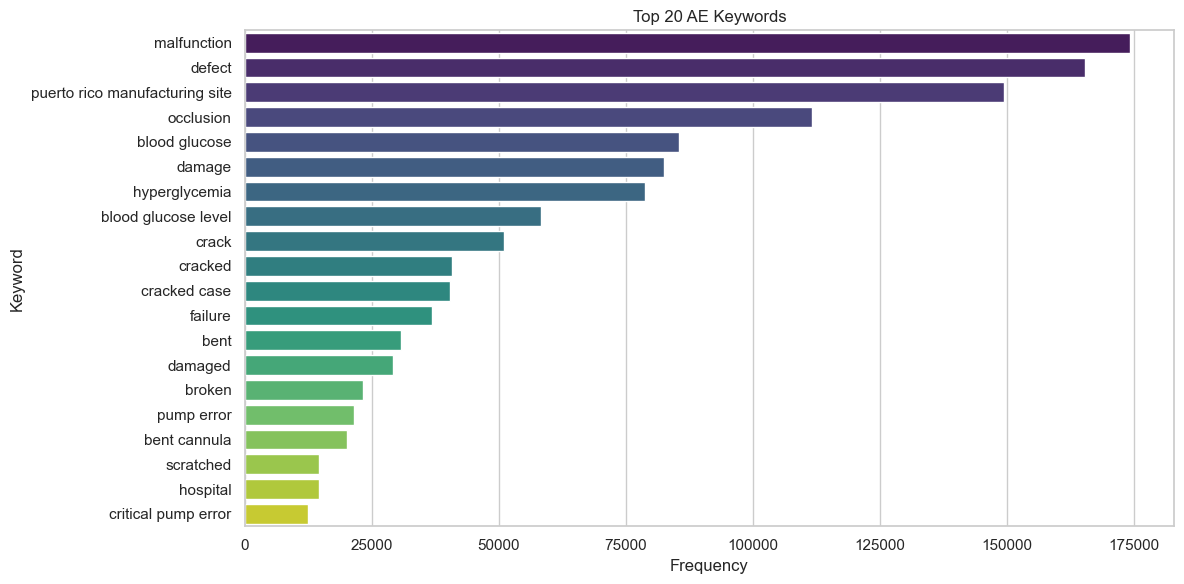

In [2]:
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})


# 1. Top 20 AE Keywords
label_counts = Counter()
for entry in df['ae_matched_labels'].dropna():
    try:
        parsed = ast.literal_eval(entry)
        for category, terms in parsed.items():
            label_counts.update(terms)
    except:
        continue

top_keywords = label_counts.most_common(20)
keywords_df = pd.DataFrame(top_keywords, columns=["Keyword", "Count"])
plt.figure(figsize=(12, 6))
sns.barplot(data=keywords_df, y="Keyword", x="Count", palette="viridis")
plt.title("Top 20 AE Keywords")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

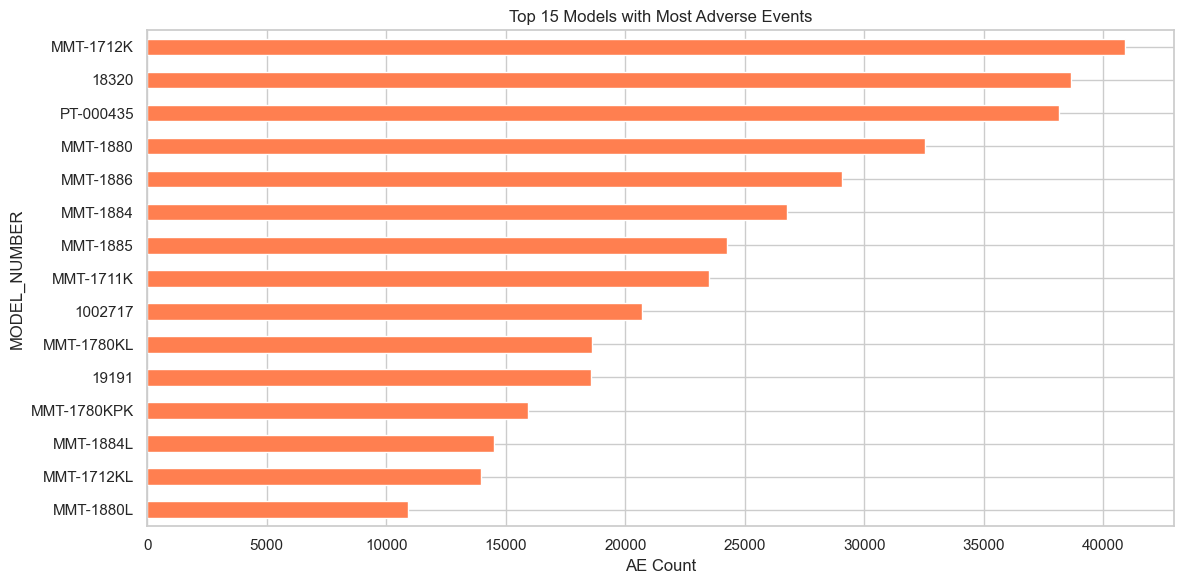

In [3]:
# 2. AE Counts by Device Model
model_ae = df[df['ae_pred'] == 'Y']['MODEL_NUMBER'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
model_ae.plot(kind='barh', color='coral')
plt.title("Top 15 Models with Most Adverse Events")
plt.xlabel("AE Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

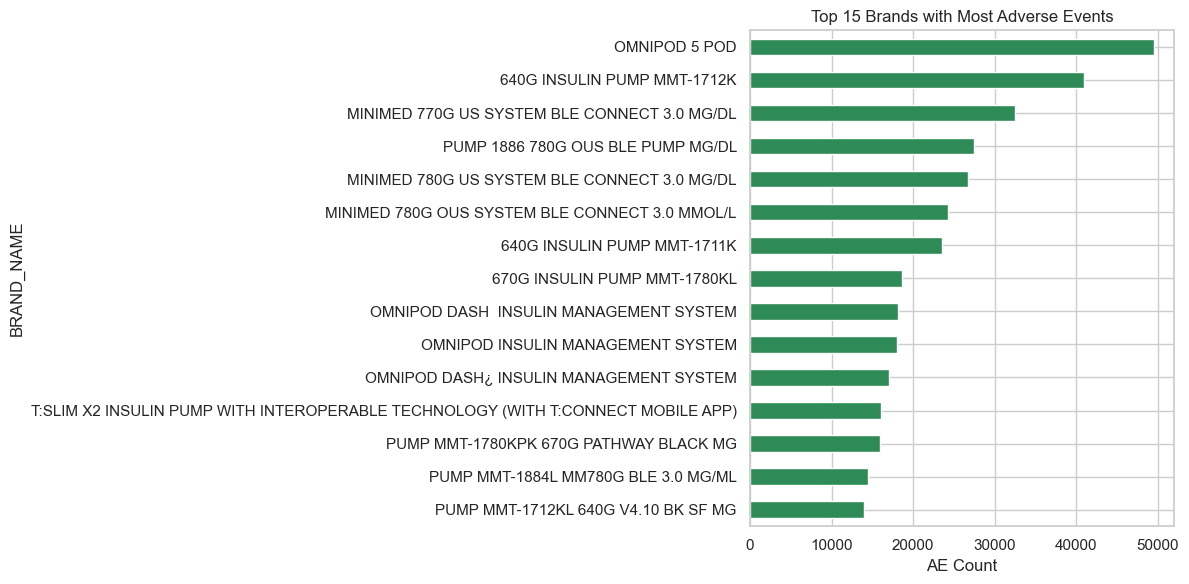

In [4]:
# 3. AE Counts by Brand Name
brand_ae = df[df['ae_pred'] == 'Y']['BRAND_NAME'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
brand_ae.plot(kind='barh', color='seagreen')
plt.title("Top 15 Brands with Most Adverse Events")
plt.xlabel("AE Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

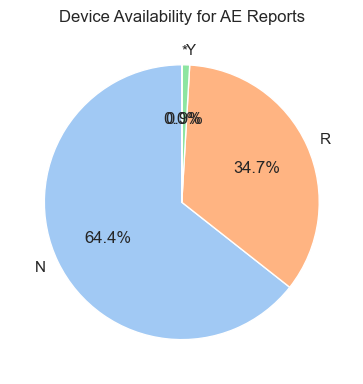

In [5]:
# 4. Device Availability Distribution
avail_dist = df[df['ae_pred'] == 'Y']['DEVICE_AVAILABILITY'].value_counts()
plt.figure(figsize=(6, 4))
avail_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Device Availability for AE Reports")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\390357059.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


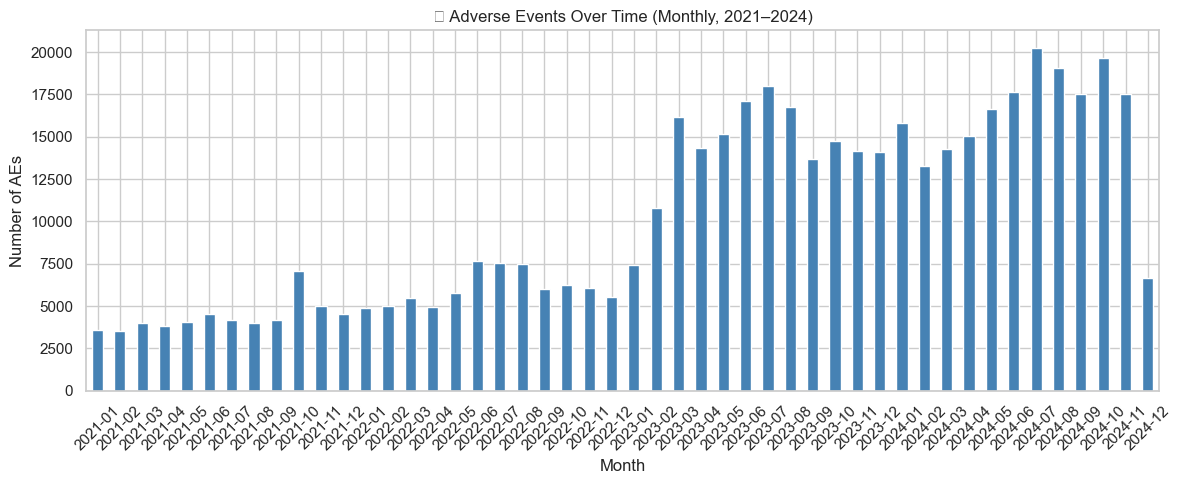

In [6]:
# Filter to relevant years
df = df[df['year'].between(2021, 2024)]

# Set style
sns.set(style="whitegrid")

# 5. AE Over Time (monthly)
plt.figure(figsize=(12, 5))
df[df['ae_pred'] == 'Y'].groupby('month').size().plot(kind='bar', color='steelblue')
plt.title("📈 Adverse Events Over Time (Monthly, 2021–2024)")
plt.ylabel("Number of AEs")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_5944\2517209469.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_word_df["year"] = top_word_df["year"].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\2517209469.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cat_df["year"] = top_cat_df["year"].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\2517209469.py:49: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\A

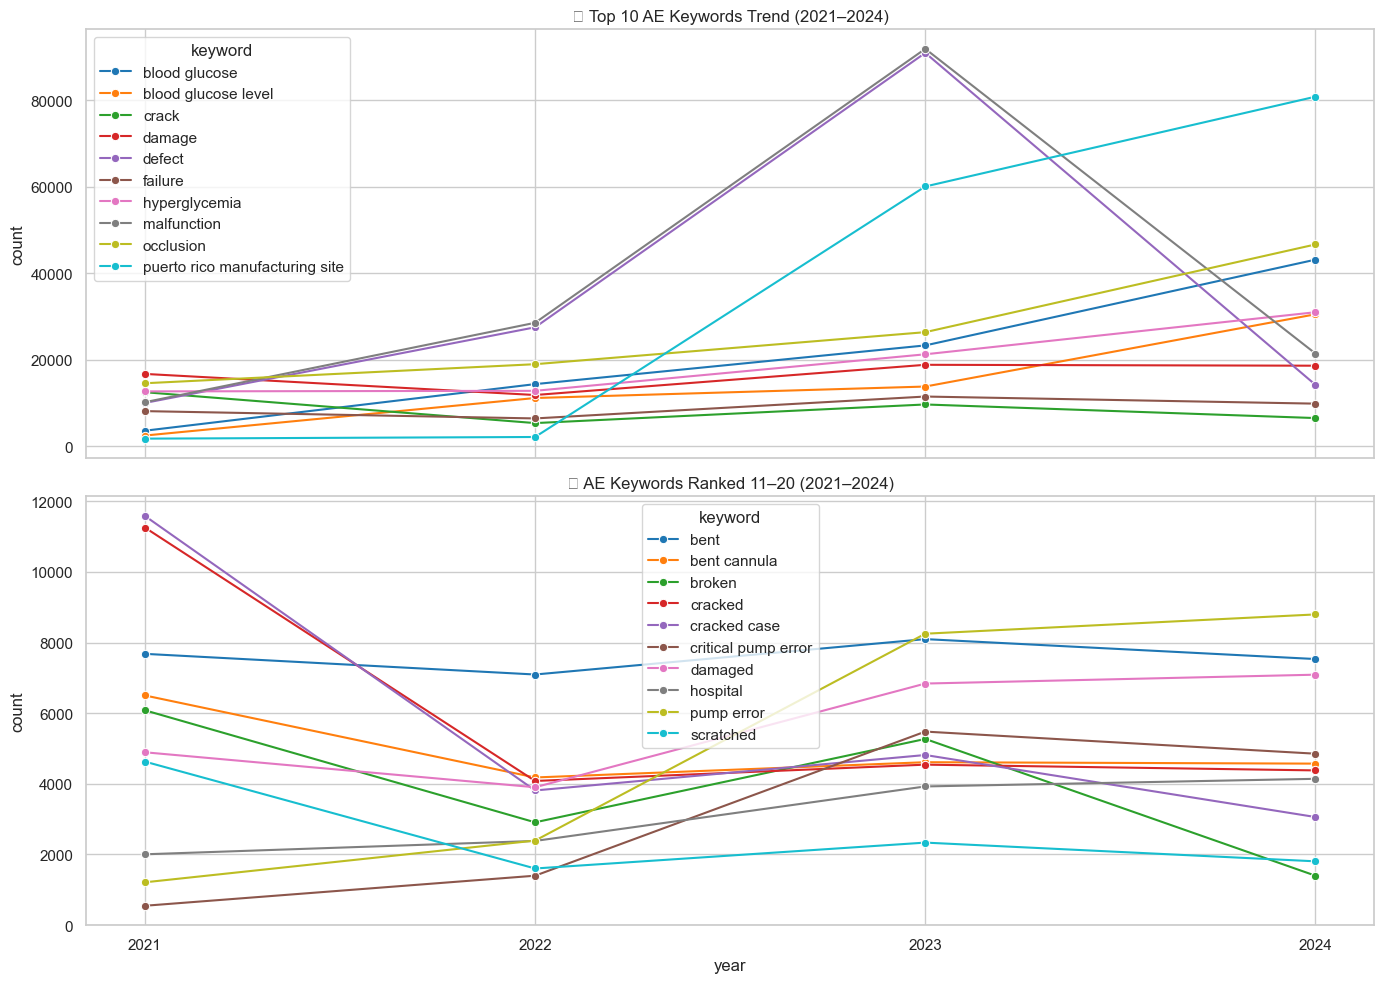

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\2517209469.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\2517209469.py:59: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


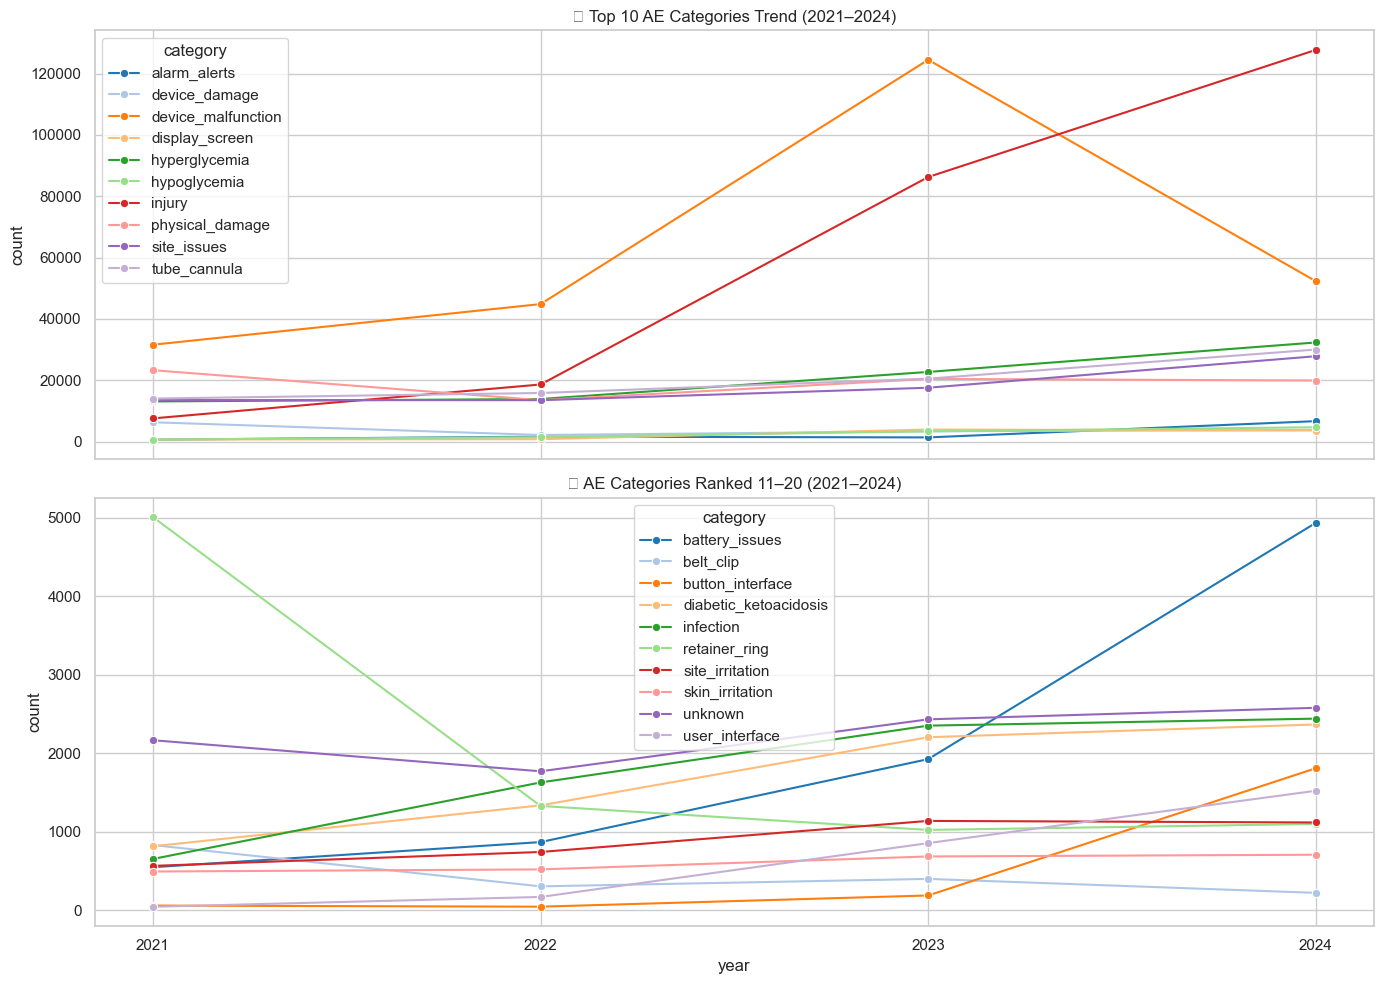

In [13]:
# Extract AE Categories
cat_data = []
for _, row in df[df['ae_pred'] == 'Y'][['year', 'ae_matched_labels']].dropna().iterrows():
    try:
        labels = ast.literal_eval(row['ae_matched_labels'])
        for cat in labels:
            cat_data.append((row['year'], cat))
    except:
        continue
cat_df = pd.DataFrame(cat_data, columns=["year", "category"])
cat_df = cat_df.groupby(["year", "category"]).size().reset_index(name="count")

# Extract AE Keywords 
word_data = []
for _, row in df[df['ae_pred'] == 'Y'][['year', 'ae_matched_labels']].dropna().iterrows():
    try:
        labels = ast.literal_eval(row['ae_matched_labels'])
        for terms in labels.values():
            for kw in terms:
                word_data.append((row['year'], kw))
    except:
        continue
word_df = pd.DataFrame(word_data, columns=["year", "keyword"])
word_df = word_df.groupby(["year", "keyword"]).size().reset_index(name="count")

# Top 20 Keywords
top_20_keywords = word_df.groupby("keyword")["count"].sum().nlargest(20).index
top_word_df = word_df[word_df["keyword"].isin(top_20_keywords)]
top_word_df["year"] = top_word_df["year"].astype(int)
 
top10_kw = top_word_df[top_word_df['keyword'].isin(top_20_keywords[:10])]
bottom10_kw = top_word_df[top_word_df['keyword'].isin(top_20_keywords[10:])]

# Top 20 Categories
top_20_categories = cat_df.groupby("category")["count"].sum().nlargest(20).index
top_cat_df = cat_df[cat_df["category"].isin(top_20_categories)]
top_cat_df["year"] = top_cat_df["year"].astype(int)

top10_cat = top_cat_df[top_cat_df['category'].isin(top_20_categories[:10])]
bottom10_cat = top_cat_df[top_cat_df['category'].isin(top_20_categories[10:])]

# 6. AE Keywords Ranked 11–20 (2021–2024)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
sns.lineplot(data=top10_kw, x="year", y="count", hue="keyword", marker="o", ax=axs[0], palette="tab10")
axs[0].set_title("🔝 Top 10 AE Keywords Trend (2021–2024)")
sns.lineplot(data=bottom10_kw, x="year", y="count", hue="keyword", marker="o", ax=axs[1], palette="tab10")
axs[1].set_title("🧾 AE Keywords Ranked 11–20 (2021–2024)")
axs[1].set_xticks([2021, 2022, 2023, 2024])
plt.tight_layout()
plt.show()

# 7. AE Categories Ranked 11–20 (2021–2024)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
sns.lineplot(data=top10_cat, x="year", y="count", hue="category", marker="o", ax=axs[0], palette="tab20")
axs[0].set_title("📊 Top 10 AE Categories Trend (2021–2024)")
sns.lineplot(data=bottom10_cat, x="year", y="count", hue="category", marker="o", ax=axs[1], palette="tab20")
axs[1].set_title("🧮 AE Categories Ranked 11–20 (2021–2024)")
axs[1].set_xticks([2021, 2022, 2023, 2024])
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\3528172332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_cat_count, x="Count", y="Category", palette="mako")
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\3528172332.py:9: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


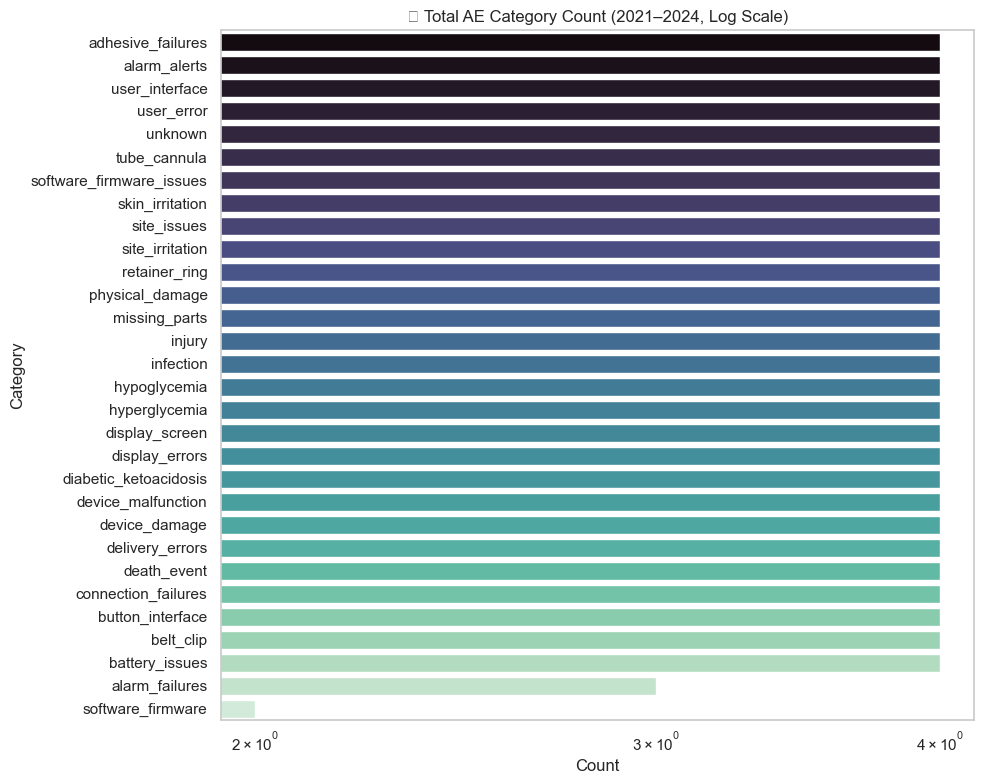

In [16]:
# 8. Total AE Category Counts (2021–2024)
total_cat_count = cat_df["category"].value_counts().reset_index()
total_cat_count.columns = ["Category", "Count"]

plt.figure(figsize=(10, 8))
sns.barplot(data=total_cat_count, x="Count", y="Category", palette="mako")
plt.xscale("log")
plt.title("🧮 Total AE Category Count (2021–2024, Log Scale)")
plt.tight_layout()
plt.show()



<Axes: title={'center': '% AE Detected Over Years'}, xlabel='year', ylabel='% AE'>

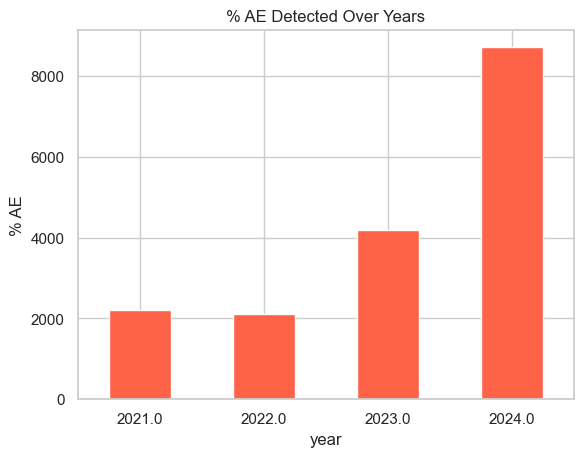

In [17]:
# 9. Negated AE Terms Over Time

neg_yearly = df[df["ae_neg"] == "neg"].groupby("year").size()
neg_yearly.plot(kind="bar", title="Negated AE Terms Over Time", color="tomato")

# 10. ae_pred = Y

total_yearly = df.groupby("year").size()
ae_yearly = df[df["ae_pred"] == "Y"].groupby("year").size()
ae_ratio = (ae_yearly / total_yearly * 100).fillna(0)

ae_ratio.plot(kind='line', marker='o', title="% AE Detected Over Years", ylabel="% AE", color='purple')


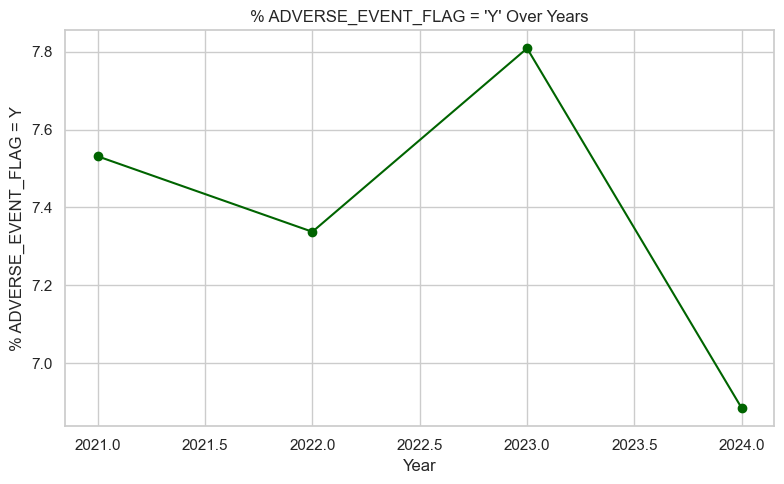

In [18]:
# 11. ADVERSE_EVENT_FLAG = Y

total_yearly = df.groupby("year").size()

# ADVERSE_EVENT_FLAG is 'Y'
true_flag_yearly = df[df["ADVERSE_EVENT_FLAG"] == "Y"].groupby("year").size()
true_flag_ratio = (true_flag_yearly / total_yearly * 100).fillna(0)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
true_flag_ratio.plot(kind='line', marker='o', color='darkgreen')
plt.title("% ADVERSE_EVENT_FLAG = 'Y' Over Years")
plt.xlabel("Year")
plt.ylabel("% ADVERSE_EVENT_FLAG = Y")
plt.grid(True)
plt.tight_layout()
plt.show()



<Axes: title={'center': 'Top AE Keywords in Death/Injury Events'}>

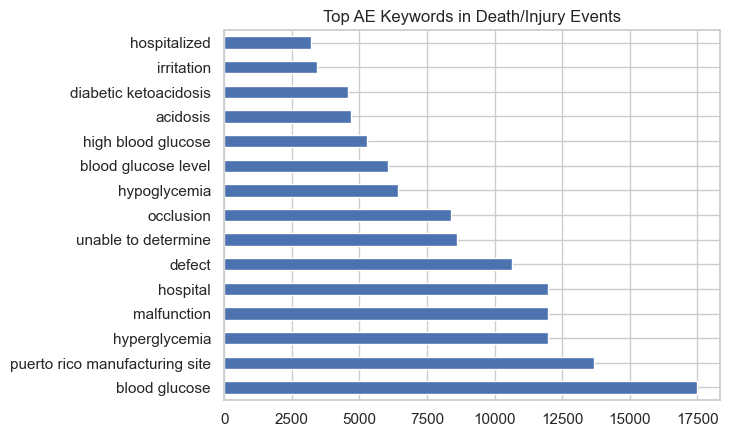

In [9]:
# 12. Top AE Keywords in Death/Injury Events

severe_df = df[df['EVENT_TYPE'].isin(['D', 'IN'])]
death_keywords = []

for _, row in severe_df.iterrows():
    try:
        parsed = ast.literal_eval(row['ae_matched_labels'])
        for values in parsed.values():
            death_keywords.extend(values)
    except:
        continue

pd.Series(Counter(death_keywords)).nlargest(15).plot(kind='barh', title="Top AE Keywords in Death/Injury Events")


C:\Users\hp\AppData\Local\Temp\ipykernel_5944\3673020609.py:25: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


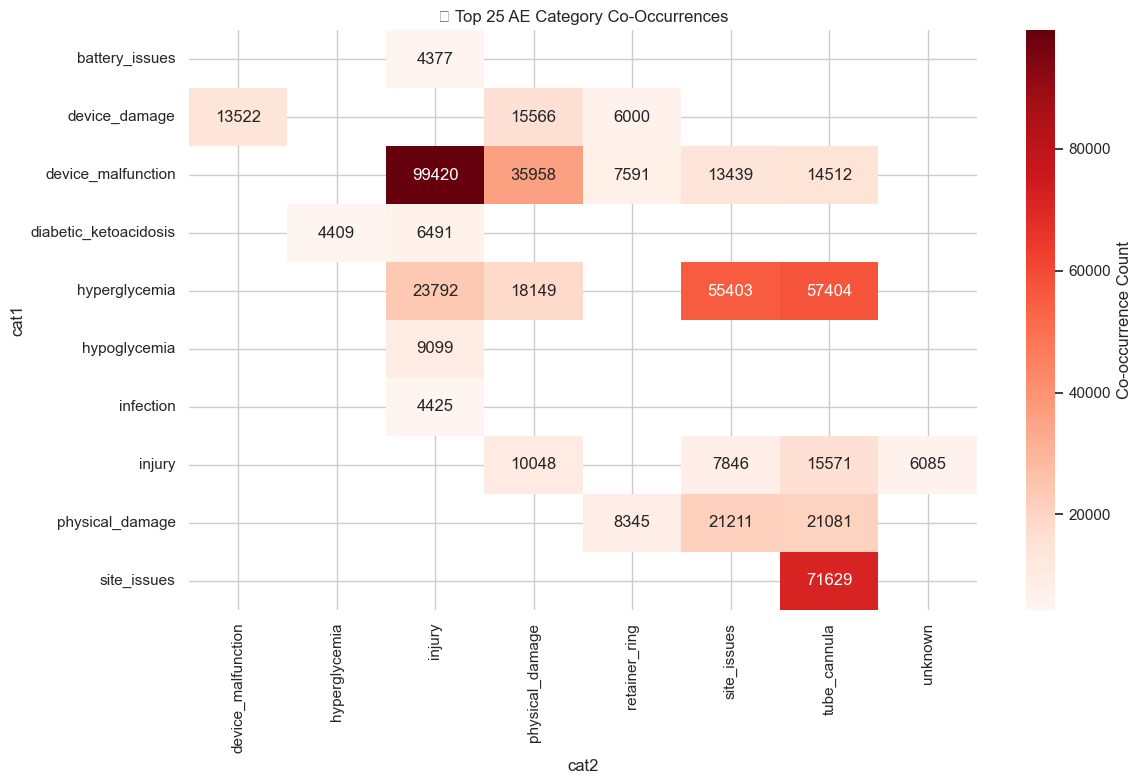

In [19]:
# 13. co-occurences

cooccurrence_counter = Counter()
for entry in df['ae_matched_labels'].dropna():
    try:
        label_dict = ast.literal_eval(entry)
        categories = list(label_dict.keys())
        if len(categories) > 1:
            pairs = combinations(sorted(categories), 2)
            cooccurrence_counter.update(pairs)
    except:
        continue


pair_df = pd.DataFrame(cooccurrence_counter.items(), columns=["pair", "count"])
pair_df = pair_df.sort_values(by="count", ascending=False).head(25)
pair_df[["cat1", "cat2"]] = pd.DataFrame(pair_df["pair"].tolist(), index=pair_df.index)

pivot = pair_df.pivot(index="cat1", columns="cat2", values="count")


plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt="g", cmap="Reds", cbar_kws={"label": "Co-occurrence Count"})
plt.title("🔗 Top 25 AE Category Co-Occurrences")
plt.tight_layout()
plt.show()

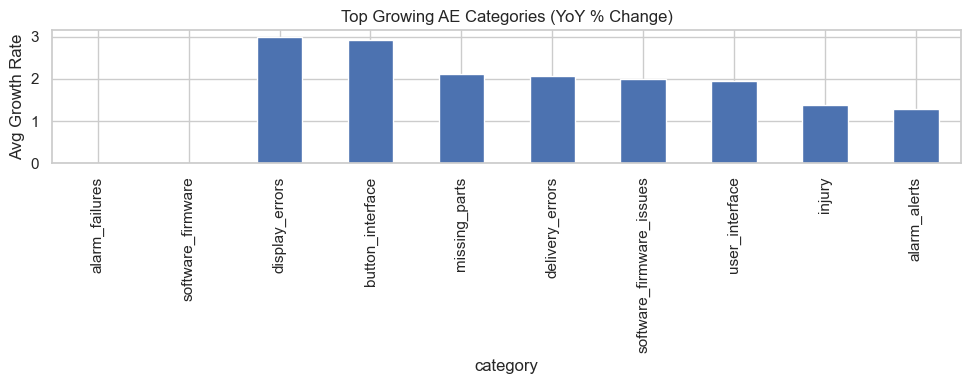

In [20]:
# 14. Category Growth Rate
category_by_year = []
for _, row in df[df['ae_pred'] == 'Y'][['year', 'ae_matched_labels']].dropna().iterrows():
    labels = ast.literal_eval(row['ae_matched_labels'])
    for cat in labels:
        category_by_year.append((row['year'], cat))
cat_df = pd.DataFrame(category_by_year, columns=['year', 'category'])
cat_growth = cat_df.groupby(['year', 'category']).size().reset_index(name='count')
pivot = cat_growth.pivot(index='year', columns='category', values='count').fillna(0)
growth_rate = pivot.pct_change().fillna(0).mean().sort_values(ascending=False)

growth_rate.head(10).plot(kind='bar', figsize=(10, 4), title="Top Growing AE Categories (YoY % Change)", ylabel="Avg Growth Rate")
plt.tight_layout()
plt.show()

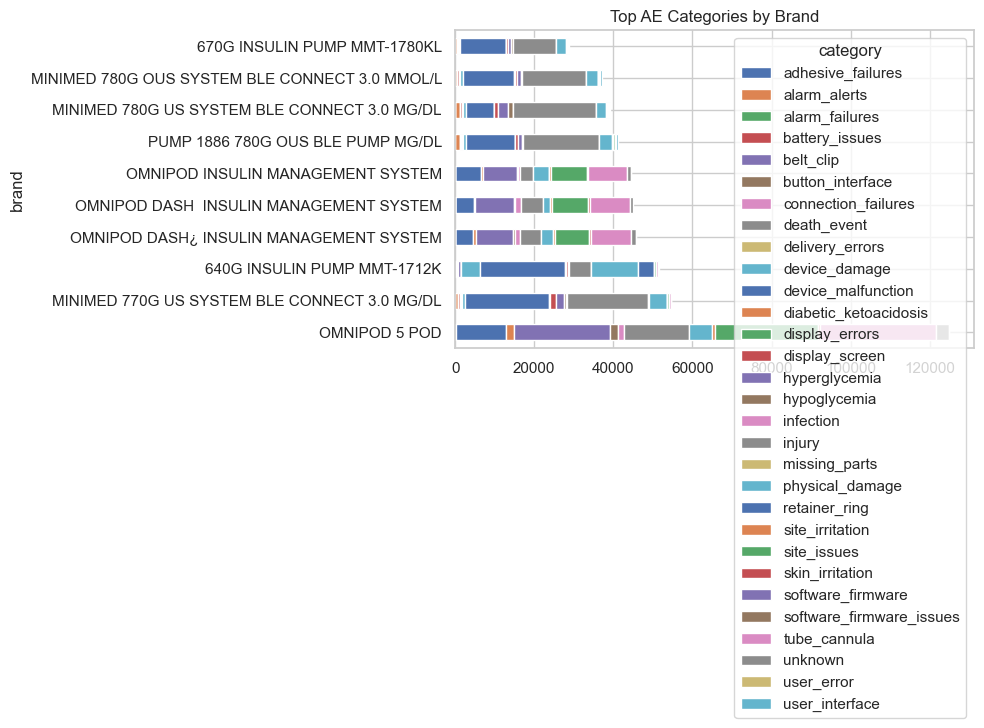

In [11]:
# 15. Failure Type by Brand
brand_cat = []
for _, row in df[df['ae_pred'] == 'Y'][['BRAND_NAME', 'ae_matched_labels']].dropna().iterrows():
    labels = ast.literal_eval(row['ae_matched_labels'])
    for cat in labels:
        brand_cat.append((row['BRAND_NAME'], cat))
brand_cat_df = pd.DataFrame(brand_cat, columns=['brand', 'category'])
top = brand_cat_df.groupby(['brand', 'category']).size().unstack(fill_value=0)
top = top.loc[top.sum(axis=1).nlargest(10).index]
top.plot(kind='barh', stacked=True, figsize=(10, 6), title="Top AE Categories by Brand")
plt.tight_layout()
plt.show()


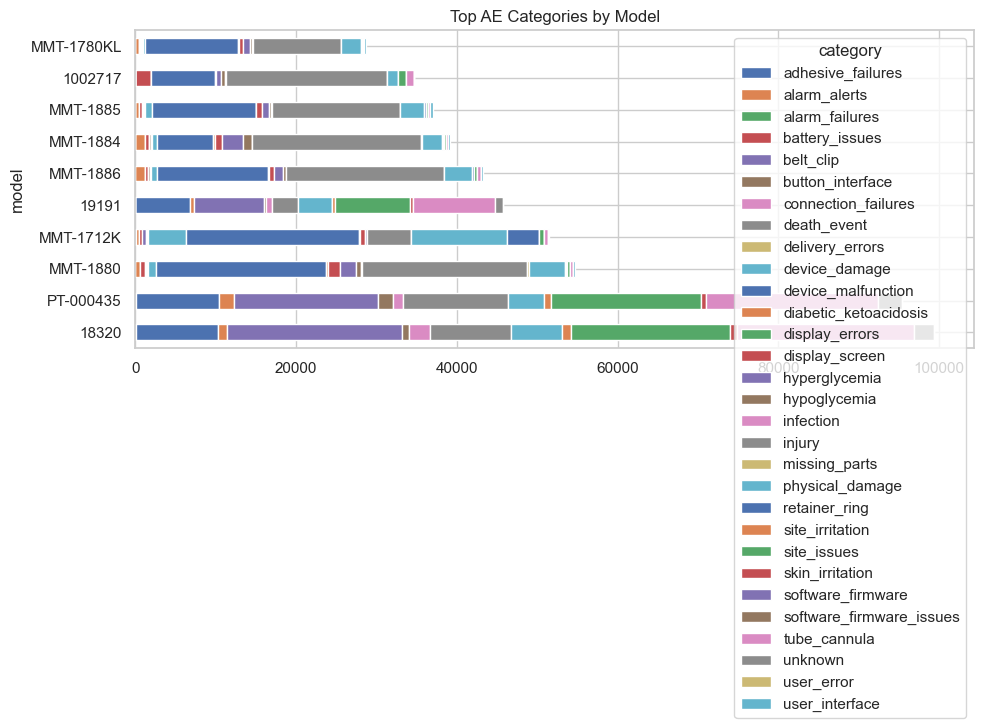

In [21]:

# 16. Failure Type by Model
model_cat = []
for _, row in df[df['ae_pred'] == 'Y'][['MODEL_NUMBER', 'ae_matched_labels']].dropna().iterrows():
    labels = ast.literal_eval(row['ae_matched_labels'])
    for cat in labels:
        model_cat.append((row['MODEL_NUMBER'], cat))
model_cat_df = pd.DataFrame(model_cat, columns=['model', 'category'])
top_model = model_cat_df.groupby(['model', 'category']).size().unstack(fill_value=0)
top_model = top_model.loc[top_model.sum(axis=1).nlargest(10).index]
top_model.plot(kind='barh', stacked=True, figsize=(10, 6), title="Top AE Categories by Model")
plt.tight_layout()
plt.show()

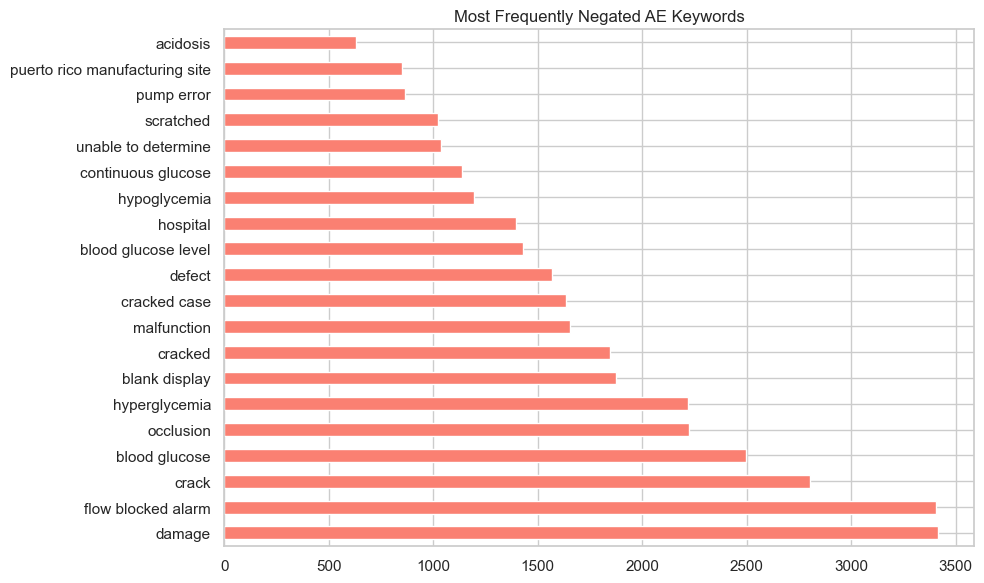

In [22]:
# 17. Keyword-Specific Negation
neg_keywords = df[df['ae_neg'] == 'neg']['ae_matched_word'].str.split(", ")
neg_list = sum(neg_keywords.dropna().tolist(), [])
neg_kw_counts = pd.Series(neg_list).value_counts().head(20)
neg_kw_counts.plot(kind='barh', figsize=(10, 6), title="Most Frequently Negated AE Keywords", color='salmon')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\1478683622.py:19: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


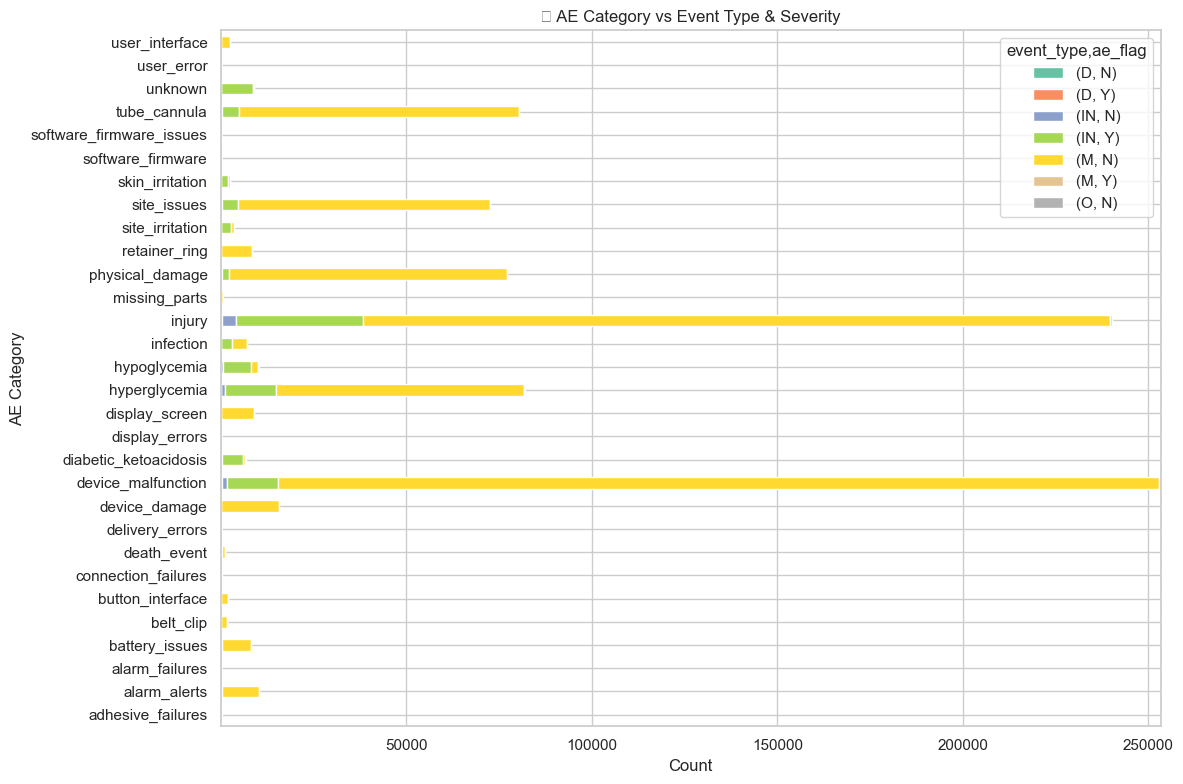

In [23]:
# 18. Category Severity Correlation
severity_records = []
for _, row in df[df["ae_pred"] == "Y"][["ADVERSE_EVENT_FLAG", "EVENT_TYPE", "ae_matched_labels"]].dropna().iterrows():
    try:
        cats = list(ast.literal_eval(row["ae_matched_labels"]).keys())
        for c in cats:
            severity_records.append((c, row["EVENT_TYPE"], row["ADVERSE_EVENT_FLAG"]))
    except:
        continue

severity_df = pd.DataFrame(severity_records, columns=["category", "event_type", "ae_flag"])
severity_summary = severity_df.groupby(["category", "event_type", "ae_flag"]).size().reset_index(name="count")

pivot_severity = severity_summary.pivot_table(index="category", columns=["event_type", "ae_flag"], values="count", fill_value=0)
pivot_severity.plot(kind="barh", stacked=True, figsize=(12, 8), colormap="Set2")
plt.title("🚨 AE Category vs Event Type & Severity")
plt.xlabel("Count")
plt.ylabel("AE Category")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5944\531699692.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, y="BRAND_NAME", x="serious_rate", palette="mako")
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\531699692.py:13: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_5944\531699692.py:13: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16

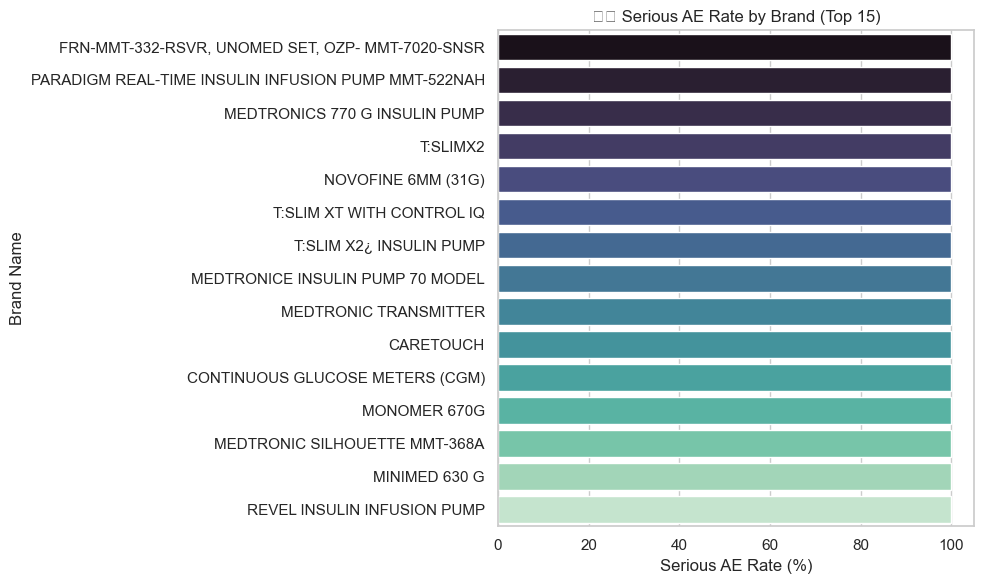

In [24]:
# 19. Volume vs Serious AE (Y) per Manufacturer
brand_stats = df.groupby("BRAND_NAME").size().reset_index(name="total_reports")
serious_stats = df[df["ADVERSE_EVENT_FLAG"] == "Y"].groupby("BRAND_NAME").size().reset_index(name="serious_reports")
brand_summary = pd.merge(brand_stats, serious_stats, on="BRAND_NAME", how="left").fillna(0)
brand_summary["serious_rate"] = (brand_summary["serious_reports"] / brand_summary["total_reports"]) * 100

top_brands = brand_summary.sort_values(by="serious_rate", ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands, y="BRAND_NAME", x="serious_rate", palette="mako")
plt.title("🏷️ Serious AE Rate by Brand (Top 15)")
plt.xlabel("Serious AE Rate (%)")
plt.ylabel("Brand Name")
plt.tight_layout()
plt.show()

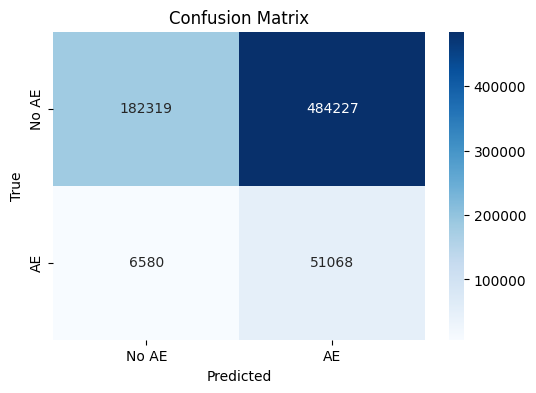

(0.32227138032074276,
 array([[182319, 484227],
        [  6580,  51068]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.27      0.43    666546\n           1       0.10      0.89      0.17     57648\n\n    accuracy                           0.32    724194\n   macro avg       0.53      0.58      0.30    724194\nweighted avg       0.90      0.32      0.41    724194\n',
 484227,
 6580)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df_acc = pd.read_csv("merged/merged_preds.csv")

df_acc = df_acc[df_acc['ADVERSE_EVENT_FLAG'].isin(['Y', 'N'])]

df_acc['true'] = df_acc['ADVERSE_EVENT_FLAG'].map({'Y': 1, 'N': 0})
df_acc['pred'] = df_acc['ae_pred'].map({'Y': 1, 'N': 0, 1: 1, 0: 0})

df_acc = df_acc.dropna(subset=['pred'])

# confusion matrix
acc = accuracy_score(df_acc['true'], df_acc['pred'])
conf_matrix = confusion_matrix(df_acc['true'], df_acc['pred'])
class_report = classification_report(df_acc['true'], df_acc['pred'])

false_positives = df_acc[(df_acc['ae_pred'] == 'Y') & (df_acc['ADVERSE_EVENT_FLAG'] == 'N')]
false_negatives = df_acc[(df_acc['ae_pred'] == 'N') & (df_acc['ADVERSE_EVENT_FLAG'] == 'Y')]

false_positives.to_csv("merged/false_positives_ae.csv", index=False)
false_negatives.to_csv("merged/false_negatives_ae.csv", index=False)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No AE', 'AE'], yticklabels=['No AE', 'AE'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

(acc, conf_matrix, class_report, len(false_positives), len(false_negatives))
